# Figure 2: Motif analysis

**Description:** Analyzing significant motifs for all models (classification, cleavage, strength) using a variety of approaches. (Main Figure)

&rarr; Run this notebook with the `tf-train` kernel


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

Using TensorFlow backend.


## IMPORTS AND SETUP

In [4]:
import utilities
from utilities import sequence, model_builder, classification_cleavage, motifs, relative_strength, genomic_context


In [5]:
## specify working directories

PROJECT = "/projects/b1080/eks/polyadenylation"
DATADIR = os.path.join(PROJECT, "manuscripts", "01_development", "data")
RESDIR  = os.path.join(PROJECT, "manuscripts", "01_development", "analysis", "resources")
OUTDIR  = os.path.join(PROJECT, "manuscripts", "01_development", "figures", "Figure_02")
os.makedirs(OUTDIR, exist_ok = True)


## IMPORT DATA

### Motif threshold lists

In [6]:
with open(os.path.join(RESDIR, 'motif_list_negative.median_then_mean.cutoff_background.pickle'), mode = 'rb') as handle:
    final_background_list = pickle.load(handle)


In [7]:
variants_patterns = ['TATAAA', 'AGTAAA', 'TTTAAA', 'AATACA', 'CATAAA', 'GATAAA', 'AATATA', 'AATGAA', 'AAGAAA']

a_patterns = ['AAAAAA','AAAAA[C|G|T]','AAAA[C|G|T]A','AAA[C|G|T]AA','AA[C|G|T]AAA','A[C|G|T]AAAA']
t_patterns = ['TTTTTT','TTTTT[A|C|G]','TTTT[A|C|G]T','TTT[A|C|G]TT','TT[A|C|G]TTT','T[A|C|G]TTTT']
g_patterns = ['GGGGGG','GGGGG[A|C|T]','GGGG[A|C|T]G','GGG[A|C|T]GG','GG[A|C|T]GGG','G[A|C|T]GGGG']

variants = [x for x in variants_patterns if x in final_background_list]
a_rich = list(set([x for x in final_background_list if (re.search("|".join(a_patterns), x) is not None) and (x not in ['AATAAA','ATTAAA'])]))
t_rich = list(set([x for x in final_background_list if (re.search("|".join(t_patterns), x) is not None)]))
g_rich = list(set([x for x in final_background_list if (re.search("|".join(g_patterns), x) is not None)]))

gt_patterns = ['GTGT','TGTG','GTCT','CTGT','TCTG','TGTC']
gt_rich = list(set([x for x in final_background_list for gt in gt_patterns if (gt in x) and ("TGTA" not in x) and ((x.count("T") >= 3) or (x.count("G") >= 3) or (x.count("C") >= 3))]))

tgta_rich = list(set([x for x in final_background_list if ("TGTA" in x)]))


In [8]:
motif_counts = {
    'AATAAA'         : 1,
    'ATTAAA'         : 1,
    'Variants'       : len(variants),
    'A-rich'         : len(a_rich),
    'TGTA': len(tgta_rich),
    'TGTA-only'      : 1,
    'T-rich'         : len(t_rich),
    'GT/CT-rich'     : len(gt_rich),
    'G-rich'         : len(g_rich),
}

for k,v in motif_counts.items(): print(f'{k:15} {v:3}')


AATAAA            1
ATTAAA            1
Variants          9
A-rich           15
TGTA             43
TGTA-only         1
T-rich           16
GT/CT-rich      122
G-rich           16


### Processed Motif Analyses

In [9]:
with open(os.path.join(RESDIR, 'motif_removal_refined.summary_stats.processed.pickle'), mode = 'rb') as handle:
    motif_summary = pickle.load(handle)

with open(os.path.join(RESDIR, 'motif_importances.pickle'), mode = 'rb') as handle:
    motif_data = pickle.load(handle)

    
    
with open(os.path.join(RESDIR, 'pas_conversion_filt.pickle'), mode = 'rb') as handle:
    pas_conversion_filt = pickle.load(handle)
    

    
with open(os.path.join(RESDIR, 'gold_rawdata.pickle'), mode = 'rb') as handle:
    gold_rawdata = pickle.load(handle)

with open(os.path.join(RESDIR, 'gold_aataaa_tgta.pickle'), mode = 'rb') as handle:
    gold_aataaa_tgta = pickle.load(handle)
    
with open(os.path.join(RESDIR, 'gold_aataaa_trich.pickle'), mode = 'rb') as handle:
    gold_aataaa_trich = pickle.load(handle)
    
with open(os.path.join(RESDIR, 'gold_aataaa_gtrich.pickle'), mode = 'rb') as handle:
    gold_aataaa_gtrich = pickle.load(handle)
    
with open(os.path.join(RESDIR, 'gold_aataaa_grich.pickle'), mode = 'rb') as handle:
    gold_aataaa_grich = pickle.load(handle)
    
with open(os.path.join(RESDIR, 'gold_aataaa_trich_gtrich.pickle'), mode = 'rb') as handle:
    gold_aataaa_trich_gtrich = pickle.load(handle)
    
with open(os.path.join(RESDIR, 'gold_aataaa_trich_grich.pickle'), mode = 'rb') as handle:
    gold_aataaa_trich_grich = pickle.load(handle)
    
with open(os.path.join(RESDIR, 'gold_aataaa_gtrich_grich.pickle'), mode = 'rb') as handle:
    gold_aataaa_gtrich_grich = pickle.load(handle)
    

    
with open(os.path.join(RESDIR, 'pas_tgta_importance.pickle'), mode = 'rb') as handle:
    tgta_fd_res = pickle.load(handle)
    
with open(os.path.join(RESDIR, 'pas_trich_importance.pickle'), mode = 'rb') as handle:
    trich_fd_res = pickle.load(handle)

with open(os.path.join(RESDIR, 'pas_gtctrich_importance.pickle'), mode = 'rb') as handle:
    gtrich_fd_res = pickle.load(handle)
    
with open(os.path.join(RESDIR, 'pas_grich_importance.pickle'), mode = 'rb') as handle:
    grich_fd_res = pickle.load(handle)

with open(os.path.join(RESDIR, 'trich_gtctrich_importance.pickle'), mode = 'rb') as handle:
    trich_gtrich_fd_res = pickle.load(handle)
    
with open(os.path.join(RESDIR, 'trich_grich_importance.pickle'), mode = 'rb') as handle:
    trich_grich_fd_res = pickle.load(handle)
    
with open(os.path.join(RESDIR, 'gtctrich_grich_importance.pickle'), mode = 'rb') as handle:
    gtrich_grich_fd_res = pickle.load(handle)


### Overview of motif importance

#### Visualize position-specific patterns in motif importance

In [10]:
with open(os.path.join(RESDIR, 'motif_negative_hmdf_strength_ann.median_then_mean.pickle'), mode = 'rb') as handle:
    hmdf_strength_all_ann = pickle.load(handle)
    

In [11]:
sdata_raw = hmdf_strength_all_ann.copy()
sdata_raw['category'] = np.nan
sdata_raw['sortidx'] = np.nan

groups = {
    'TGTA-containing' : tgta_rich,
    'AATAAA'          : ['AATAAA'],
    'ATTAAA'          : ['ATTAAA'],
    'Variants'        : variants,
    'A-rich'          : a_rich,
    'T-rich'          : t_rich,
    'GT/CT-rich'      : gt_rich,
    'G-rich'          : g_rich,
}

for i,(label,group) in enumerate(groups.items()):
    for g in group:
        sdata_raw.loc[g, 'category'] = label
        sdata_raw.loc[g, 'sortidx']  = i
        
    
print(sdata_raw.category.value_counts())

sdata     = sdata_raw.loc[~sdata_raw['category'].isna()].copy().sort_values(['sortidx','mdp_val'])
sdata_all = sdata_raw.copy().sort_values(['sortidx','mdp_val'])

sdata.to_csv(os.path.join(OUTDIR, 'motif_hmdf_strength_ann.median_then_mean.heatmap.txt'), sep = "\t")
sdata_all.to_csv(os.path.join(OUTDIR, 'motif_hmdf_strength_ann.median_then_mean.all_sig.txt'), sep = "\t")
sdata_raw.loc[sdata_raw.index.isin(final_background_list)].to_csv(os.path.join(OUTDIR, 'motif_hmdf_strength_ann.median_then_mean.all_sig2.txt'), sep = "\t")


GT/CT-rich         122
TGTA-containing     43
G-rich              16
T-rich              16
A-rich              15
Variants             8
ATTAAA               1
AATAAA               1
Name: category, dtype: int64


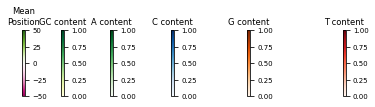

In [12]:
fig,ax = plt.subplots(1,1, figsize = (8,1.5))

mdp_smap = mpl.cm.ScalarMappable(cmap = mpl.cm.PiYG,    norm = mpl.colors.Normalize(vmin=-50, vmax=50, clip = True))
gc_smap  = mpl.cm.ScalarMappable(cmap = mpl.cm.YlGn,    norm = mpl.colors.Normalize(vmin=0,   vmax=1,  clip = True))
a_smap   = mpl.cm.ScalarMappable(cmap = mpl.cm.Greens,  norm = mpl.colors.Normalize(vmin=0,   vmax=1,  clip = True))
c_smap   = mpl.cm.ScalarMappable(cmap = mpl.cm.Blues,   norm = mpl.colors.Normalize(vmin=0,   vmax=1,  clip = True))
g_smap   = mpl.cm.ScalarMappable(cmap = mpl.cm.Oranges, norm = mpl.colors.Normalize(vmin=0,   vmax=1,  clip = True))
t_smap   = mpl.cm.ScalarMappable(cmap = mpl.cm.Reds,    norm = mpl.colors.Normalize(vmin=0,   vmax=1,  clip = True))

cbar_t   = fig.colorbar(t_smap, ax = ax); cbar_t.ax.set_title("\n".join(wrap("T content", 10)))
cbar_g   = fig.colorbar(g_smap, ax = ax); cbar_g.ax.set_title("\n".join(wrap("G content", 10)))
cbar_c   = fig.colorbar(c_smap, ax = ax); cbar_c.ax.set_title("\n".join(wrap("C content", 10)))
cbar_a   = fig.colorbar(a_smap, ax = ax); cbar_a.ax.set_title("\n".join(wrap("A content", 10)))
cbar_gc  = fig.colorbar(gc_smap, ax = ax); cbar_gc.ax.set_title("\n".join(wrap("GC content", 12)))
cbar_mdp = fig.colorbar(mdp_smap, ax = ax); cbar_mdp.ax.set_title("\n".join(wrap("Mean Position", 12)))

ax.set_visible(False)

plt.tight_layout()
plt.savefig(os.path.join(OUTDIR, 'heatmap_colorbars.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


(222, 181)


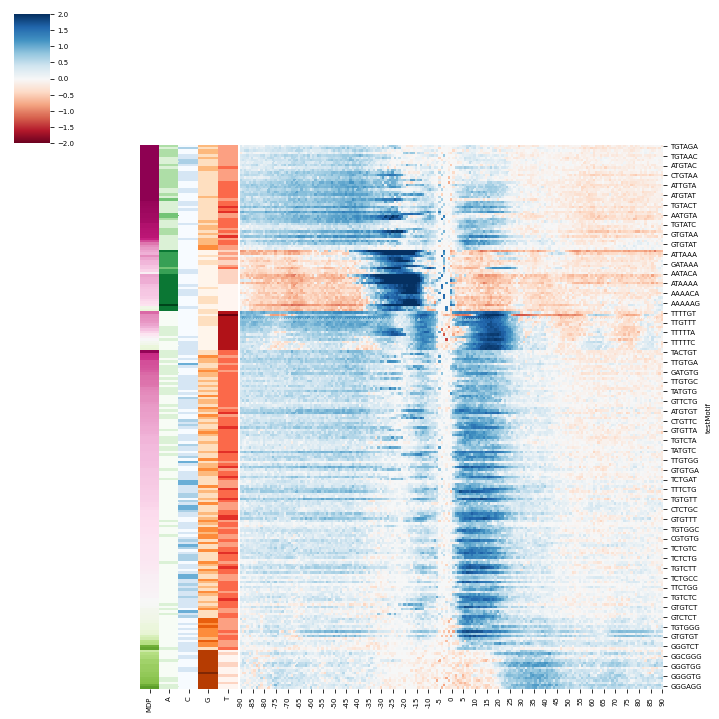

In [13]:
sdata_plot = np.sign(sdata[list(range(-90,91))]) * np.log10(np.abs(sdata[list(range(-90,91))]) + 1)
print(sdata_plot.shape)

s2 = sns.clustermap(sdata_plot, col_cluster = False, 
                    cmap = "RdBu", center = 0, 
                    vmin = -2, vmax = 2,
                    row_cluster = False, 
                    row_colors = sdata[['MDP','A','C','G','T']],
                    rasterized = True
                   )

s2.fig.savefig(os.path.join(OUTDIR, 'heatmap_strength.max_2.svg'),  format = 'svg', dpi = 600, transparent = True)


#### Correlating classification and strength importance

In [14]:
with open(os.path.join(RESDIR, 'motif_filtering_negative.median_then_mean.region_scores.pickle'), mode = 'rb') as handle:
    region_scores = pickle.load(handle)
    
region_scores['class_log1p']    = np.sign(region_scores['class']) * np.log10(np.abs(region_scores['class']))
region_scores['strength_log1p'] = np.sign(region_scores['strength']) * np.log10(np.abs(region_scores['strength']))

print("Joint positive motifs:", ((region_scores['class_log1p']>0) & (region_scores['strength_log1p']>0)).sum())


Joint positive motifs: 2871


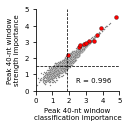

Corresponding metrics:

All data-
Pearson R: 0.9959392821304505
Spearman R: 0.8382333554531772

Positive data-
Pearson R: 0.9962952268696964
Spearman R: 0.9497165398743468

Highlighted motifs:
 measure   motif         class      strength  class_log1p  strength_log1p
192      AATAAA  64584.164929  35332.386024     4.810126        4.548173
960      ATTAAA   8336.977216   6956.693226     3.921009        3.842403
0        AAAAAA   4641.143933   2474.094464     3.666625        3.393416
4095     TTTTTT   3115.042906   1209.125794     3.493464        3.082471
3779     TGTAAT   1544.687016   1057.069592     3.188840        3.024104
3822     TGTGTG    978.851934    899.769326     2.990717        2.954131
3003     GTGTGT    793.469107    719.950074     2.899530        2.857302
3806     TGTCTG    471.216622    600.979103     2.673221        2.778859
2939     GTCTGT    364.997854    464.157439     2.562290        2.666665
2730     GGGGGG     89.198969    159.152698     1.950360        2.201814


In [15]:
highlight_list = ['AATAAA','ATTAAA','AAAAAA','GGGGGG','TTTTTT','GTGTGT','TGTGTG','GTCTGT','TGTCTG','TGTAAT']

fig, ax = plt.subplots(1,1, figsize = (1.5,1.5))

ax.axvline(-1 * np.log10(15.74 + 1), color = 'black', linewidth = 0.75, linestyle = 'dashed')
ax.axvline(+1 * np.log10(74.61 + 1), color = 'black', linewidth = 0.75, linestyle = 'dashed')

ax.axhline(-1 * np.log10(16.65 + 1), color = 'black', linewidth = 0.75, linestyle = 'dashed')
ax.axhline(+1 * np.log10(33.38 + 1), color = 'black', linewidth = 0.75, linestyle = 'dashed')

region_scores_subset = region_scores.loc[(region_scores['class_log1p'] > 0) & (region_scores['strength_log1p'] > 0)]

sns.scatterplot(data = region_scores_subset,
                x = 'class_log1p', 
                y = 'strength_log1p',
                s = 2, color = 'gray',
                rasterized = True
                )

sns.scatterplot(data = region_scores_subset.loc[region_scores_subset['motif'].isin(highlight_list)],
                x = 'class_log1p', 
                y = 'strength_log1p',
                s = 15, color = 'red', edgecolor = 'black',
                rasterized = True
                )

pcorr = st.pearsonr(region_scores_subset['class'], region_scores_subset['strength'])[0]
ax.text(0.9, 0.1, f'R = {pcorr:.03f}', ha = 'right', transform = ax.transAxes)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim((0,5))
ax.set_xlabel("Peak 40-nt window\nclassification importance")
ax.xaxis.set_major_locator(MultipleLocator(1))

ax.set_ylim((0,5))
ax.set_ylabel("Peak 40-nt window\nstrength importance")
ax.yaxis.set_major_locator(MultipleLocator(1))

plt.savefig(os.path.join(OUTDIR, 'class_strength_importance_scatter.log1p.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


print("Corresponding metrics:")

print("\nAll data-")
print("Pearson R:", st.pearsonr(region_scores['class'], region_scores['strength'])[0])
print("Spearman R:", st.spearmanr(region_scores['class'], region_scores['strength'])[0])

print("\nPositive data-")
print("Pearson R:",  st.pearsonr(region_scores_subset['class'],  region_scores_subset['strength'])[0])
print("Spearman R:", st.spearmanr(region_scores_subset['class'], region_scores_subset['strength'])[0])

print("\nHighlighted motifs:\n", region_scores.loc[region_scores['motif'].isin(highlight_list)].sort_values('class', ascending = False))


## Importance profiles

#### Summarize motif family importance

In [16]:
highlight_list_pas = {
    'AATAAA'   : ['AATAAA'],
    'ATTAAA'   : ['ATTAAA'],
    'Variants' : variants,
    'A-rich'   : a_rich,
}

highlight_list_acc = {
    'AATAAA'          : ['AATAAA'],
    'TGTA' : tgta_rich,
    'T-rich'          : t_rich,
    'GT/CT-rich'      : gt_rich,
    'G-rich'          : g_rich,
}

smoothing = 10
region = (-90,90)
xs = np.arange(*region,1)

measure = np.mean
measure_name = 'mean'


1/50 AAUAAA:   61.695   -0.146
TGTA       :    8.752   -0.725
T-rich     :   53.990   -2.242
GT/CT-rich :   13.097   -0.045
G-rich     :    6.653   -0.811


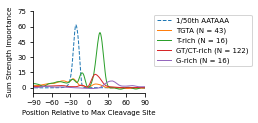

In [17]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

for h,hlist in highlight_list_acc.items():
    
    xs = motif_data[h]['data']['filt_res_all']['xs']
    means = -1 * motif_data[h]['data']['filt_res_all']['strength_means_weights'] / motif_counts[h]
    means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()
    
    if (h == 'AATAAA'):
        sns.lineplot(x = xs, y = 1/50 * means_smooth, label = f"1/50th {h}", linestyle = 'dashed', lw = 1, ax = ax)
        print(f"1/50 AAUAAA: {1/50*np.max(means_smooth):8.3f} {1/50*np.min(means_smooth):8.3f}")
    else:
        sns.lineplot(x = xs, y = means_smooth, label = f"{h} (N = {motif_counts[h]:,d})", lw = 1, ax = ax)
        print(f"{h:11}: {np.max(means_smooth):8.3f} {np.min(means_smooth):8.3f}")

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(30))

ax.set_ylim(-5,75)
ax.yaxis.set_major_locator(MultipleLocator(15))

ax.set_ylabel("\n".join(wrap("Sum Strength Importance", 30)))
ax.set_xlabel("Position Relative to Max Cleavage Site")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'family_strength_importance.non_pas.motif_normed.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


AATAAA     : 3084.744   -7.290
TGTA       :    8.752   -0.725
T-rich     :   53.990   -2.242
GT/CT-rich :   13.097   -0.045
G-rich     :    6.653   -0.811


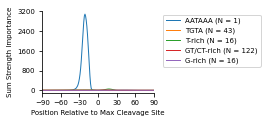

In [18]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

for h,hlist in highlight_list_acc.items():
    
    xs = motif_data[h]['data']['filt_res_all']['xs']
    means = -1 * motif_data[h]['data']['filt_res_all']['strength_means_weights'] / motif_counts[h]
    means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()
    
    sns.lineplot(x = xs, y = means_smooth, label = f"{h} (N = {motif_counts[h]:,d})", lw = 1, ax = ax)

    print(f"{h:11}: {np.max(means_smooth):8.3f} {np.min(means_smooth):8.3f}")

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(30))

ax.set_ylim(-100,3200)
ax.yaxis.set_major_locator(MultipleLocator(800))

ax.set_ylabel("\n".join(wrap("Sum Strength Importance", 30)))
ax.set_xlabel("Position Relative to Max Cleavage Site")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'family_strength_importance.non_pas.motif_normed.aataaa_scale.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


#### PAS signal comparison

Generating importance profiles for AATAAA,ATTAAA,Variants,A-rich using the mean importance with a 10nt smoothing window...
AATAAA	Peak site:  -20	Peak score: 6.21	Min score: -1.04
ATTAAA	Peak site:  -19	Peak score: 4.43	Min score: -0.62
Variants	Peak site:  -20	Peak score: 1.82	Min score: -0.30
A-rich	Peak site:  -18	Peak score: 1.43	Min score: -0.36


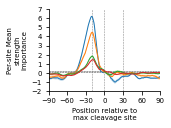

In [19]:
motifs.plot_motif_importance_persite(OUTDIR, motif_data,
                                     ['AATAAA','ATTAAA','Variants','A-rich'], ['C0','C1','C2','C3'], 
                                     figsize = (2,1.5),
                                     xlims = (-90,90), xtickints = 30, ylims = (-2,7), ytickints=1, 
                                     vlines = [-20,0,30], verbose = True)


#### Individual motif families

Generating importance profiles for TGTA using the mean importance with a 10nt smoothing window...
TGTA	Peak site:  -26	Peak score: 376.32	Min score: -31.18


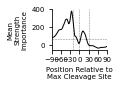

Generating importance profiles for T-rich using the mean importance with a 10nt smoothing window...
T-rich	Peak site:   18	Peak score: 863.83	Min score: -35.87


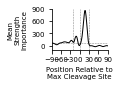

Generating importance profiles for GT/CT-rich using the mean importance with a 10nt smoothing window...
GT/CT-rich	Peak site:   10	Peak score: 1597.83	Min score: -5.54


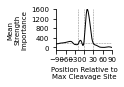

Generating importance profiles for G-rich using the mean importance with a 10nt smoothing window...
G-rich	Peak site:   37	Peak score: 106.44	Min score: -12.98


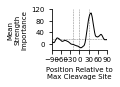

In [20]:
motifs.plot_motif_importance_profile(OUTDIR, motif_data, ['TGTA'],       xlims = (-90,90), xtickints = 30, ylims = (-50,400),   ytickints = 200, vlines = [-20,0,30], verbose = True)
motifs.plot_motif_importance_profile(OUTDIR, motif_data, ['T-rich'],     xlims = (-90,90), xtickints = 30, ylims = (-100,900),  ytickints = 300, vlines = [-20,0,30], verbose = True)
motifs.plot_motif_importance_profile(OUTDIR, motif_data, ['GT/CT-rich'], xlims = (-90,90), xtickints = 30, ylims = (-100,1600), ytickints = 400, vlines = [-20,0,30], verbose = True)
motifs.plot_motif_importance_profile(OUTDIR, motif_data, ['G-rich'],     xlims = (-90,90), xtickints = 30, ylims = (-20,120),   ytickints = 40,  vlines = [-20,0,30], verbose = True)


Generating importance profiles for TGTA using the mean importance with a 10nt smoothing window...
TGTA	Number of motifs: 43	Peak site: -43	Peak score: 23.55	Min score: 0.01


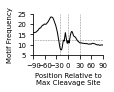

Generating importance profiles for T-rich using the mean importance with a 10nt smoothing window...
T-rich	Number of motifs: 16	Peak site: 18	Peak score: 138.29	Min score: 0.03


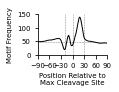

Generating importance profiles for GT/CT-rich using the mean importance with a 10nt smoothing window...
GT/CT-rich	Number of motifs: 122	Peak site: 8	Peak score: 28.67	Min score: 0.01


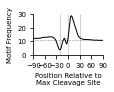

Generating importance profiles for G-rich using the mean importance with a 10nt smoothing window...
G-rich	Number of motifs: 16	Peak site: 38	Peak score: 16.31	Min score: 0.01


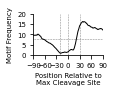

In [21]:
motifs.plot_motif_frequency_profile(OUTDIR, motif_data, ['TGTA'],      xlims = (-90,90), xtickints = 30, ylims = (5,25),  ytickints = 5,  vlines = [-20,0,30], verbose = True)
motifs.plot_motif_frequency_profile(OUTDIR, motif_data, ['T-rich'],    xlims = (-90,90), xtickints = 30, ylims = (0,150), ytickints = 50, vlines = [-20,0,30], verbose = True)
motifs.plot_motif_frequency_profile(OUTDIR, motif_data, ['GT/CT-rich'],   xlims = (-90,90), xtickints = 30, ylims = (0,30),  ytickints = 10, vlines = [-20,0,30], verbose = True)
motifs.plot_motif_frequency_profile(OUTDIR, motif_data, ['G-rich'],    xlims = (-90,90), xtickints = 30, ylims = (0,20),  ytickints = 5,  vlines = [-20,0,30], verbose = True)


#### Confirming similar importance profiles for members of GU/CU-rich family

Generating importance profiles for GTGTGT,TGTGTG,CTCTGT,TCTCTG,GTCTGT,TGTCTG using the mean importance with a 10nt smoothing window...
GTGTGT	Peak site:   11	Peak score: 46.03	Min score: -0.88
TGTGTG	Peak site:   10	Peak score: 52.55	Min score: -0.31
CTCTGT	Peak site:   12	Peak score: 20.13	Min score: -0.39
TCTCTG	Peak site:   11	Peak score: 19.90	Min score: -0.27
GTCTGT	Peak site:   11	Peak score: 29.29	Min score: -0.31
TGTCTG	Peak site:   10	Peak score: 37.28	Min score: -0.23


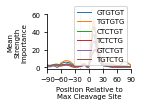

In [22]:
motifs.plot_motif_importance_individual(OUTDIR, motif_data,
                                        ['GTGTGT','TGTGTG','CTCTGT','TCTCTG','GTCTGT','TGTCTG'], ['GT/CT-rich']*6,
                                        ['C0','C1','C2','C3','C4','C5'], 
                                        figsize = (1.5,1),
                                        xlims = (-90,90), xtickints = 30, 
                                        ylims = (-2,60),  ytickints = 20,  
                                        vlines = [-20,0,30], verbose = True)


## Converting AATAAA to other PAS

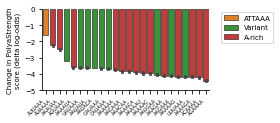

Summary data-
          count      mean       std        min       25%       50%       75%  \
motif                                                                          
AUUAAA  23793.0 -1.604780  1.394252  -9.595386 -2.505457 -1.578212 -0.540307   
AUAAAA  23793.0 -2.224116  2.763341 -15.947932 -4.359825 -0.657619  0.017003   
AAAUAA  23793.0 -2.483201  3.013720 -16.602318 -4.779501 -0.916000  0.012973   
AGUAAA  23793.0 -3.196566  2.390209 -14.433238 -4.840834 -3.342927 -1.376589   
AAAAUA  23793.0 -3.594397  3.189112 -17.994845 -5.842486 -3.733869 -0.324341   
UAUAAA  23793.0 -3.610225  2.752019 -16.162767 -5.505078 -3.817720 -1.585635   
AAUAUA  23793.0 -3.623839  2.738072 -15.519200 -5.486131 -3.820783 -1.591495   
AAUACA  23793.0 -3.632812  2.667595 -15.222370 -5.462569 -3.849277 -1.671975   
GAUAAA  23793.0 -3.645123  2.690175 -15.434127 -5.501209 -3.853346 -1.679462   
CAUAAA  23793.0 -3.673267  2.735306 -15.757680 -5.542154 -3.878300 -1.671975   
AAAAAA  23793.0 -3.749106 

In [23]:
fig,ax = plt.subplots(1,1, figsize = (3,1.5))

plot_data = pas_conversion_filt.loc[~(pas_conversion_filt['category'].isin(['AATAAA','Random']))].copy()
plot_data['motif'] = plot_data['motif'].str.replace("T", "U")

sns.barplot(data = plot_data, x = 'motif', y = 'diffStrength', 
            order = plot_data.groupby('motif')['diffStrength'].describe().sort_values('mean', ascending = False).index.values,
            hue = 'category', dodge = False, palette = ['C1','C2','C3'],
            edgecolor = 'black', linewidth = 0.5, ci = 90)

ax.set_xticklabels(ax.get_xticklabels(), fontsize = 5, rotation = 45, ha = 'right')
ax.set_ylim(-5,0)

ax.set_xlabel("")
ax.set_ylabel("Change in PolyaStrength\nscore (delta log-odds)")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'pas_conversion_barplot.delta.individual.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


print("Summary data-")
print(plot_data.groupby('motif')['diffStrength'].describe().sort_values('mean', ascending = False))


## Motif crosstalk

In [24]:
single_panel_width_row1 = 0.85
single_panel_width_row2 = 1.00
double_panel_width = (single_panel_width_row1 * 2.25) + 0.5
single_panel_height = 1.5
upper_lower_panel_ratios = [2.5, 1]


#### AATAAA to TGTA Distances

Beginning frequency and score tabulation using: dist_upPAS_tgta
Distance range covered: 4 106
Mean score: 0.7032943735518856
Peak score  : 0.9916791823204426 @ position -13
Min score   : 0.4348769190140844 @ position 0
Peak frequency: 203.0
Cumulative frequency: 6141.0


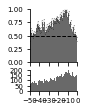

In [27]:
tgta_upPAS_inputs = motifs.tabulate_intermotif_distances(tgta_fd_res['upPAS'], gold_aataaa_tgta, 'dist_upPAS_tgta', flip = True)

motifs.plot_intermotif_distances(OUTDIR, 'mean', tgta_upPAS_inputs, 'tgta.distance_upPAS', 'dimgray', 
                                 single_panel_width_row1, single_panel_height, upper_lower_panel_ratios,
                                 (-50,0), 10, (0,205), 50, (0,1), 0.25,
                                 0.3, 0.3, 0.5)


Beginning frequency and score tabulation using: dist_downPAS_tgta
Distance range covered: 6 98
Mean score: 0.3431102403711026
Peak score  : 0.4497057684210528 @ position 5
Min score   : -0.21584090789473684 @ position 0
Peak frequency: 135.0
Cumulative frequency: 1273.0


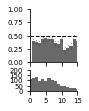

In [28]:
tgta_downPAS_inputs = motifs.tabulate_intermotif_distances(tgta_fd_res['downPAS'], gold_aataaa_tgta, 'dist_downPAS_tgta', flip = False)

motifs.plot_intermotif_distances(OUTDIR, 'mean', tgta_downPAS_inputs, 'tgta.distance_downPAS', 'dimgray', 
                                 single_panel_width_row1, single_panel_height, upper_lower_panel_ratios,
                                 (0,15), 5, (0,205), 50, (0,1), 0.25,
                                 0.3, 0.3, 0.5)


#### AATAAA to T-rich Distances

Beginning frequency and score tabulation using: dist_upPAS_trich
Distance range covered: 6 118
Mean score: 0.34797738255801436
Peak score  : 0.6026817751937982 @ position -1
Min score   : 0.08878114285714289 @ position -48
Peak frequency: 604.0
Cumulative frequency: 9675.0


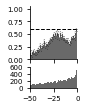

In [29]:
trich_upPAS_inputs = motifs.tabulate_intermotif_distances(trich_fd_res['upPAS'], gold_aataaa_trich, 
                                                   'dist_upPAS_trich', flip = True)
                              
motifs.plot_intermotif_distances(OUTDIR, 'mean', trich_upPAS_inputs, 'trich.distance_upPAS_trich', 'dimgray', 
                                 single_panel_width_row1, single_panel_height, upper_lower_panel_ratios,
                                 (-50,0), 25, (0,605), 200, (0,1.05), 0.25, 
                                 0.3, 0.3, 0.6)


Beginning frequency and score tabulation using: dist_downPAS_trich
Distance range covered: 6 109
Mean score: 0.7128126224531909
Peak score  : 1.0125735311572701 @ position 3
Min score   : 0.42241788152173926 @ position 0
Peak frequency: 556.0
Cumulative frequency: 4080.0


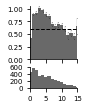

In [30]:
trich_downPAS_inputs = motifs.tabulate_intermotif_distances(trich_fd_res['downPAS'], gold_aataaa_trich, 
                                                     'dist_downPAS_trich', flip = False)

motifs.plot_intermotif_distances(OUTDIR, 'mean', trich_downPAS_inputs, 'trich.distance_downPAS_trich', 'dimgray', 
                                 single_panel_width_row1, single_panel_height, upper_lower_panel_ratios,
                                 (0,15), 5, (0,605), 200, (0,1.05), 0.25, 
                                 0.3, 0.3, 0.6)


Beginning frequency and score tabulation using: dist_downCS_trich
Distance range covered: 10 224
Mean score: 1.0472826003940665
Peak score  : 1.897053120165746 @ position 29
Min score   : 0.19192430952380957 @ position 54
Peak frequency: 384.0
Cumulative frequency: 8892.0


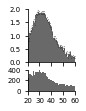

In [31]:
trich_downCS_inputs = motifs.tabulate_intermotif_distances(trich_fd_res['downCS'], gold_aataaa_trich, 
                                                   'dist_downCS_trich', flip = False)

motifs.plot_intermotif_distances(OUTDIR, 'mean', trich_downCS_inputs, 'trich.distance_downCS_trich', 'dimgray', 
                                 single_panel_width_row1, single_panel_height, upper_lower_panel_ratios,
                                 (20,60), 10, (0,400), 200, (0,2), 0.5, 
                                 0.3, 0.3)


#### AATAAA to GT/CT-Rich Distances

Beginning frequency and score tabulation using: dist_gtrich
Distance range covered: 9 225
Mean score: 0.6159862374426778
Peak score  : 1.5267538853503198 @ position 24
Min score   : -0.002854666666666669 @ position 73
Peak frequency: 549.0
Cumulative frequency: 15011.0


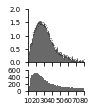

In [32]:
gtrich_downCS_inputs = motifs.tabulate_intermotif_distances(gtrich_fd_res['downCS'], gold_aataaa_gtrich, 'dist_gtrich', flip = False)

motifs.plot_intermotif_distances(OUTDIR, 'mean', gtrich_downCS_inputs, 'gtrich.distance_downCS', 'dimgray', 
                                 single_panel_width_row2, single_panel_height, upper_lower_panel_ratios,
                                 (10,80), 10, (0,600), 200, (0,2), 0.5,
                                 0.3, 0.3, None)


#### AATAAA to G-Rich Distances

Beginning frequency and score tabulation using: dist_grich
Distance range covered: 10 232
Mean score: 0.6269829423031893
Peak score  : 1.3603763809523808 @ position 54
Min score   : -0.2543597173913043 @ position 30
Peak frequency: 78.0
Cumulative frequency: 2991.0


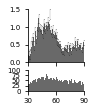

In [33]:
grich_downCS_inputs = motifs.tabulate_intermotif_distances(grich_fd_res['downCS'], gold_aataaa_grich, 'dist_grich', flip = False)

motifs.plot_intermotif_distances(OUTDIR, 'mean', grich_downCS_inputs, 'grich.distance_downCS', 'dimgray', 
                                 single_panel_width_row2, single_panel_height, upper_lower_panel_ratios,
                                 (30,90), 30, (0,100), 25, (0,1.5), 0.5,
                                 0.3, 0.3, None)


#### T-Rich - G-Rich Distances

Beginning frequency and score tabulation using: dist_grich_trich
Distance range covered: -107 121
T-rich
Peak score: 1.0785803100961537 @ position -3.5
Mean score: 0.4504984152558594
Peak frequency: 40.0
Cumulative frequency: 226.0
G-rich
Peak score: 0.6958667374999999 @ position -7.5
Mean score: 0.29464826743061673
Peak frequency: 40.0
Cumulative frequency: 226.0


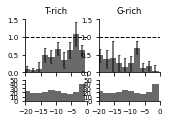

T-rich
Peak score: 1.446234345982143 @ position 11.5
Mean score: 1.0851982728015328
Peak frequency: 66.0
Cumulative frequency: 932.0
G-rich
Peak score: 0.7991148214285715 @ position 19.5
Mean score: 0.5676297558043963
Peak frequency: 66.0
Cumulative frequency: 932.0


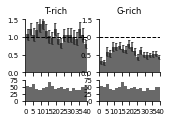

In [37]:
trich_grich_downCS_inputs = motifs.tabulate_motif_motif_distances(trich_grich_fd_res['downCS'], 
                                                                  gold_aataaa_trich_grich, 'dist_grich_trich', 
                                                                  'T-rich', 'G-rich', flip = False)

motifs.plot_motif_motif_distances(OUTDIR, 'mean', trich_grich_downCS_inputs, ['T-rich','G-rich'], 
                                  'trich_grich.distance_downCS.negative', 'dimgray', 2,
                                  double_panel_width, single_panel_height, upper_lower_panel_ratios,
                                  (-20,0), 5, (0,50), 10, (0,1.5), 0.5, 1)

motifs.plot_motif_motif_distances(OUTDIR, 'mean', trich_grich_downCS_inputs, ['T-rich','G-rich'], 
                                  'trich_grich.distance_downCS.positive', 'dimgray', 2,
                                  double_panel_width, single_panel_height, upper_lower_panel_ratios,
                                  (0,40), 5, (0,75), 25, (0,1.5), 0.5, 1)


#### T-Rich - GT/CT-Rich Distances

Beginning frequency and score tabulation using: dist_trich_gtrich
Distance range covered: -121 114
T-rich
Peak score: 1.3101794999999996 @ position -17.0
Mean score: 0.9277544173930903
Peak frequency: 129.0
Cumulative frequency: 1868.0
GT/CT-rich
Peak score: 0.8785705124999998 @ position -1.0
Mean score: 0.4434291800675373
Peak frequency: 129.0
Cumulative frequency: 1868.0


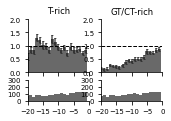

T-rich
Peak score: 1.6690948030303032 @ position 1.0
Mean score: 1.0271075741079343
Peak frequency: 273.0
Cumulative frequency: 3015.0
GT/CT-rich
Peak score: 1.1173544870129875 @ position 1.0
Mean score: 0.8921213351883372
Peak frequency: 273.0
Cumulative frequency: 3015.0


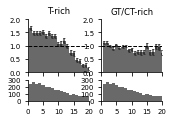

In [38]:
trich_gtrich_downCS_inputs = motifs.tabulate_motif_motif_distances(trich_gtrich_fd_res['downCS'], 
                                                                   gold_aataaa_trich_gtrich, 'dist_trich_gtrich', 
                                                                   'T-rich', 'GT/CT-rich', flip = False)

motifs.plot_motif_motif_distances(OUTDIR, 'mean', trich_gtrich_downCS_inputs, ['T-rich','GT/CT-rich'], 
                           'trich_gtrich.distance_downCS.negative', 'dimgray', 1,
                           double_panel_width, single_panel_height, upper_lower_panel_ratios,
                           (-20,0), 5, (0,300), 100, (0,2), 0.5, 1)

motifs.plot_motif_motif_distances(OUTDIR, 'mean', trich_gtrich_downCS_inputs, ['T-rich','GT/CT-rich'], 
                           'trich_gtrich.distance_downCS.positive', 'dimgray', 1,
                           double_panel_width, single_panel_height, upper_lower_panel_ratios,
                           (0,20), 5, (0,300), 100, (0,2), 0.5, 1)


#### GT/CT-Rich - G-Rich Distances

Beginning frequency and score tabulation using: dist_grich_gtrich
Distance range covered: -108 115
GT/CT-rich
Peak score: 0.6202393454861111 @ position -3.5
Mean score: 0.4289414081440717
Peak frequency: 39.0
Cumulative frequency: 244.0
G-rich
Peak score: 0.4733961166666666 @ position -9.5
Mean score: 0.21864291658216373
Peak frequency: 39.0
Cumulative frequency: 244.0


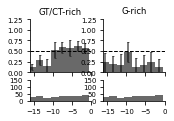

GT/CT-rich
Peak score: 1.217956967391304 @ position 5.5
Mean score: 1.0259184342824745
Peak frequency: 120.0
Cumulative frequency: 2201.0
G-rich
Peak score: 0.9705169014202172 @ position 15.5
Mean score: 0.657924972737724
Peak frequency: 120.0
Cumulative frequency: 2201.0


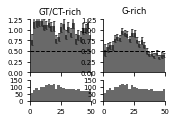

In [39]:
gtrich_grich_downCS_inputs = motifs.tabulate_motif_motif_distances(gtrich_grich_fd_res['downCS'], 
                                                                   gold_aataaa_gtrich_grich, 'dist_grich_gtrich', 
                                                                   'GT/CT-rich', 'G-rich', flip = False)

motifs.plot_motif_motif_distances(OUTDIR, 'mean', gtrich_grich_downCS_inputs, ['GT/CT-rich','G-rich'], 
                                  'gtrich_grich.distance_downCS.negative', 'dimgray', 2,
                                  double_panel_width, single_panel_height, upper_lower_panel_ratios,
                                  (-16,0), 5, (0,150), 50, (0,1.25), 0.25, 0.5)

motifs.plot_motif_motif_distances(OUTDIR, 'mean', gtrich_grich_downCS_inputs, ['GT/CT-rich','G-rich'], 
                                  'gtrich_grich.distance_downCS.positive', 'dimgray', 2,
                                  double_panel_width, single_panel_height, upper_lower_panel_ratios,
                                  (0,50), 25, (0,150), 50, (0,1.25), 0.25, 0.5)
